In [20]:
import pandas as pd  # おなじみpandas
import glob  # ファイル名を取得するライブラリ
import librosa  # 今回の主役librosa

In [21]:
list_ceps = []  # 抽出したMFCCを格納するリスト
list_label = []  # 正常(0)、異常(1)ラベルを格納するリスト

In [22]:
# normalのwavを処理
filelist = glob.glob('normal/*.wav')  # ワイルドカードでnormal*.wavのリストを作成

for filename in filelist:
    y, sr = librosa.core.load(filename,sr=None)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)
    
    # 複数のローリングウィンドウでそれぞれ20次元のMFCCを得られるので、その平均をとる。
    ceps = mfcc.mean(axis=1)
    
    # リストに追加
    list_ceps.append(ceps)  # 20次元のMFCCを追加
    list_label.append(0)  # 正常ラベル(0)を追加

In [23]:
# abnormalのwavを処理
filelist = glob.glob('abnormal/*.wav')  # ワイルドカードでnormal_*.wavのリストを作成

for filename in filelist:
    y, sr = librosa.core.load(filename,sr=None)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20, dct_type=1)
    
    # 複数のローリングウィンドウでそれぞれ20次元のMFCCを得られるので、その平均をとる。
    ceps = mfcc.mean(axis=1)
    
    # リストに追加
    list_ceps.append(ceps)  # 20次元のMFCCを追加
    list_label.append(1)  # 正常ラベル(0)を追加

In [24]:
# データフレーム化

# 20次元のMFCCのデータフレームを作成
df_ceps = pd.DataFrame(list_ceps)  

columns_name = []  # カラム名を"dct+連番"でつける
for i in range(20):
    columns_name_temp = 'dct{0}'.format(i)
    columns_name.append(columns_name_temp)

df_ceps.columns = columns_name

# ラベル（正常0、異常1）のデータフレームを作成
df_label = pd.DataFrame(list_label, columns=['label'])  

# 横にconcat
df = pd.concat([df_label, df_ceps], axis = 1)

In [25]:
df.head()

,label,dct0,dct1,dct2,dct3,dct4,dct5,dct6,dct7,dct8,...,dct10,dct11,dct12,dct13,dct14,dct15,dct16,dct17,dct18,dct19
0,0,-614.259766,179.779388,-0.250227,29.626169,24.024084,-0.341812,-15.064142,1.208726,13.874377,...,-3.170184,-0.076731,6.132704,1.600983,0.404689,-5.154559,-5.943622,3.034371,-0.718879,-4.807708
1,0,-625.889526,189.339462,7.130262,26.307257,26.606775,0.477493,-20.248371,-3.734877,17.593031,...,-1.464577,-2.800908,3.552602,2.421587,-0.964363,-7.718919,-7.667501,5.945717,3.088436,-8.946833
2,1,-549.137634,102.838600,11.102546,22.443304,41.204994,18.523266,-9.264235,2.915510,9.361494,...,-8.456090,-0.563161,-2.915150,0.860960,-2.316025,-7.352574,-11.207822,1.916152,-0.478303,-6.496466
3,1,-624.195129,147.320587,-10.266932,31.772373,44.354378,19.481836,-2.507862,6.154775,7.464746,...,-2.150683,-2.828262,-3.496582,1.186642,-7.045084,-7.629160,-11.277425,3.338194,4.067062,-4.795290


In [26]:
from sklearn import svm

In [27]:
model = svm.LinearSVC()
model.fit(list_ceps, list_label)

C:\Users\tomoy\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC()

In [28]:
from sklearn.metrics import accuracy_score

pred = model.predict(list_ceps)
print(accuracy_score(list_label, pred))

1.0


In [29]:
print(model.predict(list_ceps))

[0 0 1 1]


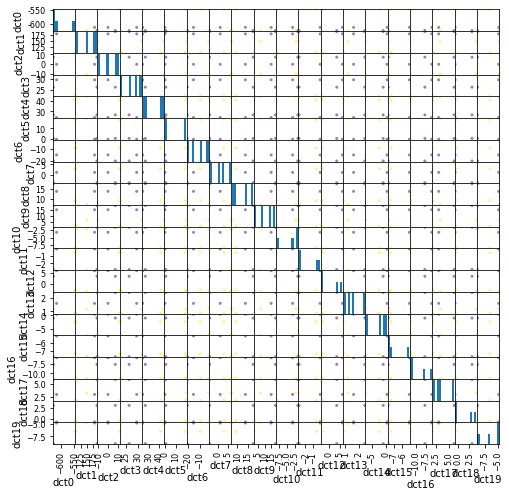

In [31]:
from pandas import plotting 
import matplotlib.pyplot as plt
plotting.scatter_matrix(df.iloc[:, 1:], figsize=(8, 8), c=list(df.iloc[:, 0]), alpha=0.5)
plt.show()

In [32]:
from sklearn.decomposition import PCA #主成分分析器

In [33]:
# 行列の標準化
dfs = df.iloc[:, 1:].apply(lambda x: (x-x.mean())/x.std(), axis=0)
dfs.head()

,dct0,dct1,dct2,dct3,dct4,dct5,dct6,dct7,dct8,dct9,dct10,dct11,dct12,dct13,dct14,dct15,dct16,dct17,dct18,dct19
0,-0.298194,0.639306,-0.231991,0.512899,-0.980849,-0.902498,-0.431400,-0.103551,0.395192,0.592699,0.201611,1.025163,1.113969,0.123707,0.890500,1.487624,1.159465,-0.307501,-0.902864,0.741617
1,-0.616666,0.884171,0.553735,-0.302015,-0.728120,-0.827635,-1.110563,-1.301548,1.211189,1.042933,0.738739,-0.848477,0.573136,1.340315,0.467904,-0.620883,0.510610,1.400201,0.653646,-1.369750
2,1.485126,-1.331404,0.976625,-1.250756,0.700393,0.821273,0.328420,0.310059,-0.595085,-1.151996,-1.463022,0.690605,-0.782613,-0.973435,0.050676,-0.319661,-0.821939,-0.963413,-0.804512,-0.119818
3,-0.570266,-0.192072,-1.298369,1.039871,1.008576,0.908861,1.213542,1.095040,-1.011295,-0.483636,0.522671,-0.867291,-0.904491,-0.490586,-1.409080,-0.547080,-0.848137,-0.129288,1.053729,0.747952


In [34]:
#主成分分析の実行
pca = PCA()
pca.fit(dfs)
# データを主成分空間に写像
feature = pca.transform(dfs)

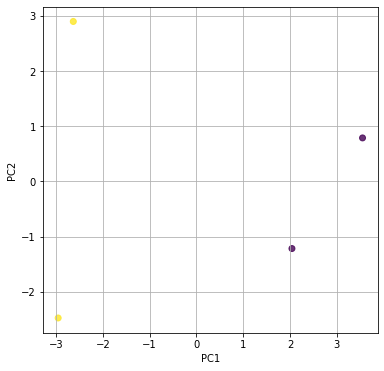

In [37]:
# 第一主成分と第二主成分でプロットする
plt.figure(figsize=(6, 6))
plt.scatter(feature[:, 0], feature[:, 1], alpha=0.8, c=list(df.iloc[:, 0]))
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()